# Análisis de datos

Se realiza un análisis exploratorio de datos con base a las ventas de 2021 a 2022 de todos los producto de la marca A y Y, y todos los canales. Lo anterior servirá para automatizar el análisi datos en el futuro. 

También se realiza un modelo de regresión lineal para predecir las ventas del filtro del purificador de agua (477) con relación a una variación en las ventas del purificador de agua (965).  

### a) Carga de librerias y de datos

In [1]:
##Análisis de Datos de las ventas diarias 24-10-22 y modelo de regresión linea (PA5L-FPA5L)
#Importación de librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
from sklearn import metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from datetime import datetime
import math
import plotly.express as px
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

!pip install pingouin
import pingouin as pg

In [2]:
# Preprocesado y análisis
# ==============================================================================
import statsmodels.api as sm
import pingouin as pg
from scipy import stats
from scipy.stats import pearsonr

In [3]:
import os

In [8]:
os.chdir(r'C:\\Users\\Grupo Jinim\\OneDrive - GRUPO JINIM SA DE CV/Documentos/2022/Reportes semanales')

In [9]:
data = pd.read_excel(r'Total Canales 24.10.2022 - Copia.xlsx', sheet_name='db')
data.head()

,Fecha,Dia,Mes,Sem,Categoria.,Marca.,Canal.,Ano,Cantidad,Total Sin Iva,Categoria Cuotas,Sku,YTD,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,01/01/2021,Viernes,Enero,53 Sem,Calentadores Agua,A,ClaroShop,2021,1,2183.16,Calentadores Agua,873,ok,NaN,NaN,NaN,NaN
1,01/01/2021,Viernes,Enero,53 Sem,Parrillas,A,ClaroShop,2021,1,3233.16,Parrillas,878,ok,NaN,NaN,NaN,NaN
2,01/01/2021,Viernes,Enero,53 Sem,Campanas Extractoras,A,Liverpool,2021,1,3081.96,Campanas Extractoras,274,ok,NaN,NaN,NaN,NaN
3,01/01/2021,Viernes,Enero,53 Sem,Campanas Extractoras,A,Liverpool,2021,1,4199.16,Campanas Extractoras,705,ok,NaN,NaN,NaN,NaN
4,01/01/2021,Viernes,Enero,53 Sem,Calentadores Agua,A,Liverpool,2021,1,1443.96,Calentadores Agua,827,ok,NaN,NaN,NaN,NaN


In [10]:
data.dtypes

Fecha                object
Dia                  object
Mes                  object
Sem                  object
Categoria.           object
Marca.               object
Canal.               object
Ano                   int64
Cantidad              int64
Total Sin Iva       float64
Categoria Cuotas     object
Sku                   int64
YTD                  object
Unnamed: 13         float64
Unnamed: 14         float64
Unnamed: 15          object
Unnamed: 16         float64
dtype: object

In [21]:
data = data.drop(['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'], axis = 1)

In [22]:
#Convertir la Fecha en formato Fecha, Creando un nuevo data.frame
data2 = data.assign(Date = pd.to_datetime(data['Fecha']))

In [23]:
data2.head()

,Fecha,Dia,Mes,Sem,Categoria.,Marca.,Canal.,Ano,Cantidad,Total Sin Iva,Categoria Cuotas,Sku,YTD,Date
0,01/01/2021,Viernes,Enero,53 Sem,Calentadores Agua,A,ClaroShop,2021,1,2183.16,Calentadores Agua,873,ok,2021-01-01
1,01/01/2021,Viernes,Enero,53 Sem,Parrillas,A,ClaroShop,2021,1,3233.16,Parrillas,878,ok,2021-01-01
2,01/01/2021,Viernes,Enero,53 Sem,Campanas Extractoras,A,Liverpool,2021,1,3081.96,Campanas Extractoras,274,ok,2021-01-01
3,01/01/2021,Viernes,Enero,53 Sem,Campanas Extractoras,A,Liverpool,2021,1,4199.16,Campanas Extractoras,705,ok,2021-01-01
4,01/01/2021,Viernes,Enero,53 Sem,Calentadores Agua,A,Liverpool,2021,1,1443.96,Calentadores Agua,827,ok,2021-01-01


In [24]:
print(data["Fecha"].dtypes)
print(data2["Date"].dtypes)

object
datetime64[ns]


In [25]:
#Crear nuevas variables que nos den días, años...
data2['Day'] = data2['Date'].dt.day
data2['Week'] = data2['Date'].dt.week
data2['Month'] = data2['Date'].dt.month
data2['Year'] = data2['Date'].dt.year

In [26]:
data2.dtypes

Fecha                       object
Dia                         object
Mes                         object
Sem                         object
Categoria.                  object
Marca.                      object
Canal.                      object
Ano                          int64
Cantidad                     int64
Total Sin Iva              float64
Categoria Cuotas            object
Sku                          int64
YTD                         object
Date                datetime64[ns]
Day                          int64
Week                         int64
Month                        int64
Year                         int64
dtype: object

### b) Análisi descriptivo de datos cualitativos
Se realiza un análisi descriptivo de los datos cuantitativos.
Para el período 2021-2022 la media de ventas díarias para todos los productos y todos los canales es de 2.13 unidades,siendo 567 el número máximo de unidades vendidas en un día y una unidad el mínimo. La desviación estandar por cantidad es de 5.56.

El promedio de venta diaría en pesos es de 3935.8, la venta máxima en un día es de 641667.7 y el mínimo -13.86.   

In [27]:
#T1
data2.describe()

,Ano,Cantidad,Total Sin Iva,Sku,Day,Week,Month,Year
count,167802.000000,167802.000000,167802.000000,167802.000000,167802.000000,167802.000000,167802.000000,167802.000000
mean,2021.513790,2.136774,3935.886998,597.152340,16.416241,26.142579,6.419101,2021.513790
std,0.499811,5.562108,8362.566615,259.337465,8.593536,14.961038,3.431793,0.499811
min,2021.000000,1.000000,-13.860984,104.000000,1.000000,1.000000,1.000000,2021.000000
25%,2021.000000,1.000000,1378.448276,362.000000,10.000000,13.000000,3.000000,2021.000000
50%,2022.000000,1.000000,2326.724138,659.000000,16.000000,27.000000,7.000000,2022.000000
75%,2022.000000,2.000000,3688.793103,827.000000,24.000000,38.000000,9.000000,2022.000000
max,2022.000000,567.000000,641667.730000,974.000000,31.000000,53.000000,12.000000,2022.000000


### c) Análisis descriptivo de datos cuantitativos
La categoría más vendida es parrillas, seguido de calentadores de agua, fitness y campanas extractoras. Los productos mencionados comprenden más del 70% del total de categorías vendidas.

Para los datos usados en este análisis Mercado Libre representa el 40% de las transacciones, seguido de Liverpool, Amazon y  Walmart. Los cuatro canales mencionados concentran más del 90% de las transacciones para el 2021 y 2022.  

Por último, el producto más vendido es la parrilla VT4, seguido de 827, 878, 929 y 419. 

<AxesSubplot:title={'center':'Categorias'}>

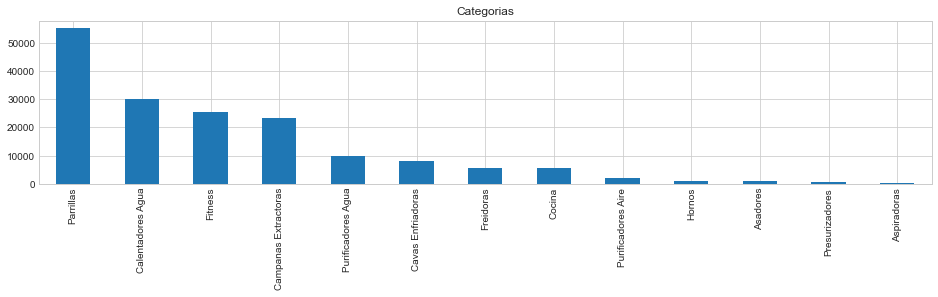

In [28]:
# G1. Descripción datos categóricos
pd.value_counts(data2['Categoria.'])
plt.figure(figsize=(16,3))
data2['Categoria.'].value_counts().plot(kind='bar', title='Categorias')

<AxesSubplot:title={'center':'Categorias%'}>

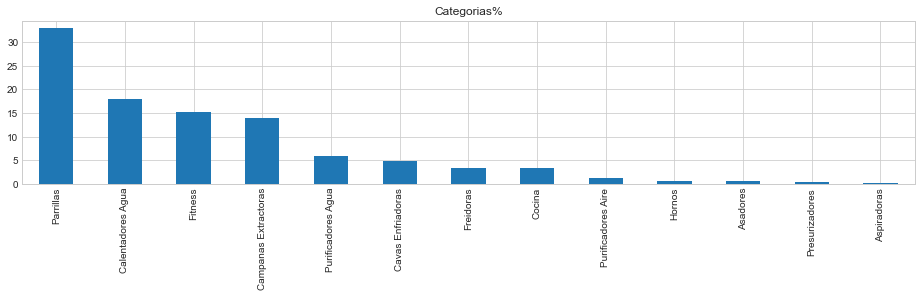

In [29]:
#G2.
plt.figure(figsize=(16,3))
(100*data2['Categoria.'].value_counts()/ len(data2['Categoria.'])).plot(kind='bar', title='Categorias%')

<AxesSubplot:title={'center':'Canal'}>

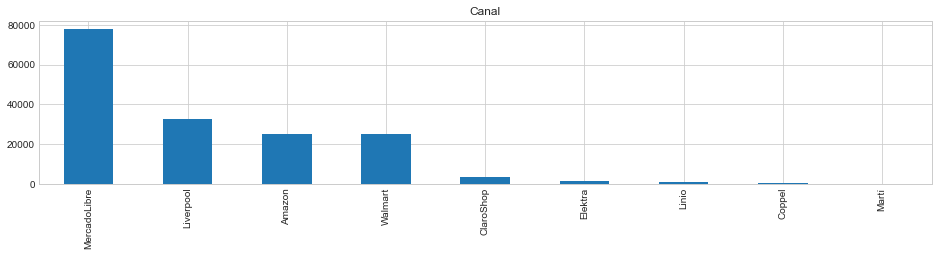

In [30]:
#G3. Canal
pd.value_counts(data2['Canal.'])
plt.figure(figsize=(16,3))
data2['Canal.'].value_counts().plot(kind='bar',
                                            title='Canal')

<AxesSubplot:title={'center':'Canal%'}>

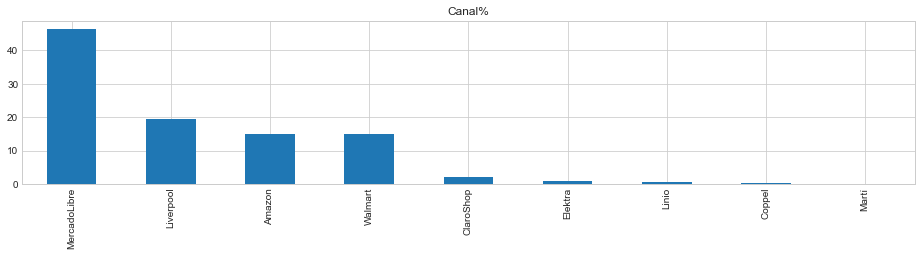

In [31]:
#G4. 
plt.figure(figsize=(16,3))
(100*data2['Canal.'].value_counts()/ len(data2['Canal.'])).plot(kind='bar', title='Canal%')

<AxesSubplot:title={'center':'Canal'}, ylabel='Canal.'>

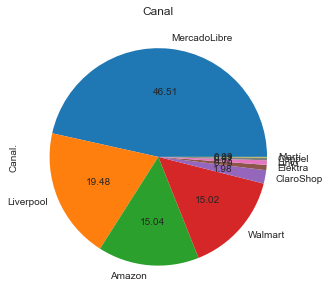

In [32]:
#G5. 
data2['Canal.'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(5, 5),
                                            title='Canal')

<AxesSubplot:title={'center':'Sku'}>

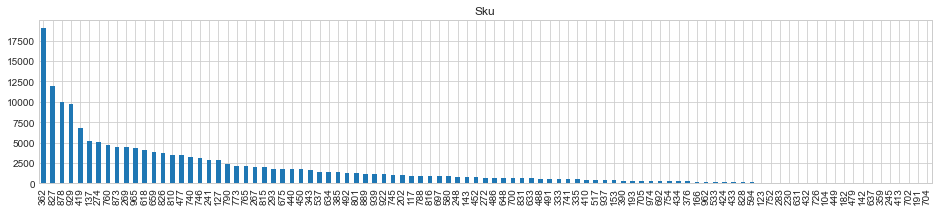

In [33]:
#G6. SKU
pd.value_counts(data2['Sku'])
plt.figure(figsize=(16,3))
data2['Sku'].value_counts().plot(kind='bar',
                                            title='Sku')

### d) Análisis de ventas históricas
En la gráfica G7. y G9. se observa el comportamiento de las ventas totales díarias en unidades. Los meses con una mayor venta son mayo, julio, noviembre y diciembre, miesntras que los que menos ventas reportaron son los meses de febrero, marzo, abril, junio, y septiembre (para el 2022).

Respecto a las ventas promedio semanales (G8.) son las semanas que corresponden a temporadas de promoción como el Hot Sale (Sem 21 y 22), el Prime Day (Sem 25 para 2021 y Sem 28 para 2022) y  el Buen Fin (Sem 46 y 47) las que reportaron un mayor número de ventas. 

Los meses con mayor venta en pesos son mayo, julio, noviembre y diciembre.

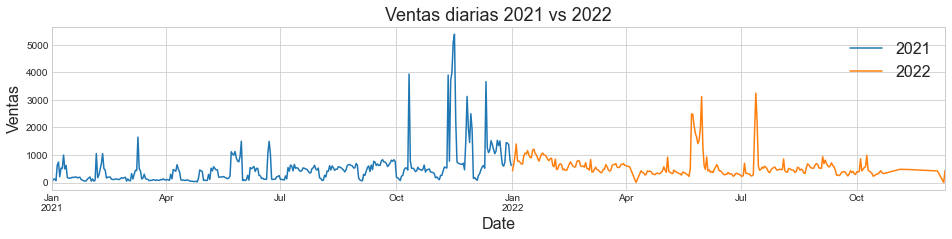

In [34]:
#G7. Ventas históricas

plt.figure(figsize=(16,3))
data2[data2['Year'] == 2021].groupby('Date')['Cantidad'].sum().plot()
data2[data2['Year'] == 2022].groupby('Date')['Cantidad'].sum().plot()

plt.title('Ventas diarias 2021 vs 2022', fontsize=18)
plt.legend(['2021', '2022'], loc='best', fontsize=16)
plt.ylabel('Ventas', fontsize=16)
plt.xlabel('Date', fontsize=16);

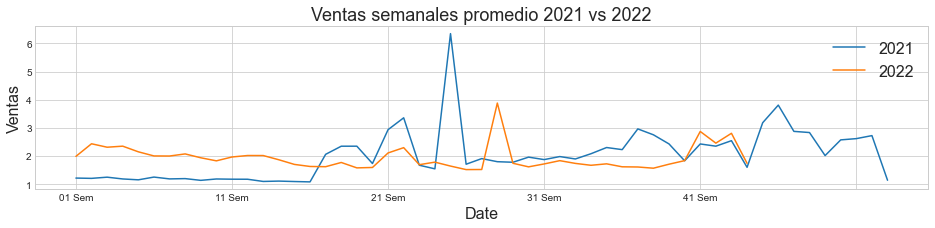

In [35]:
#G8. Ventas Semanales promedio 2022 vs 2021
plt.figure(figsize=(16,3))
data2[data2['Year'] == 2021].groupby('Sem')['Cantidad'].mean().plot()
data2[data2['Year'] == 2022].groupby('Sem')['Cantidad'].mean().plot()

plt.title('Ventas semanales promedio 2021 vs 2022', fontsize=18)
plt.legend(['2021', '2022'], loc='best', fontsize=16)
plt.ylabel('Ventas', fontsize=16)
plt.xlabel('Date', fontsize=16);

In [36]:
#Remplazar los meses por números
data3 = data2.assign(NMes = data2.Mes.replace({"Enero": 1, "Febrero": 2, "Marzo": 3, "Abril": 4, "Mayo": 5, "Junio": 6,
                                               "Julio": 7, "Agosto": 8, "Septiembre": 9, "Octubre": 10, "Noviembre": 11, 
                                               "Diciembre": 12,}))
data3

,Fecha,Dia,Mes,Sem,Categoria.,Marca.,Canal.,Ano,Cantidad,Total Sin Iva,Categoria Cuotas,Sku,YTD,Date,Day,Week,Month,Year,NMes
0,01/01/2021,Viernes,Enero,53 Sem,Calentadores Agua,A,ClaroShop,2021,1,2183.160000,Calentadores Agua,873,ok,2021-01-01,1,53,1,2021,1
1,01/01/2021,Viernes,Enero,53 Sem,Parrillas,A,ClaroShop,2021,1,3233.160000,Parrillas,878,ok,2021-01-01,1,53,1,2021,1
2,01/01/2021,Viernes,Enero,53 Sem,Campanas Extractoras,A,Liverpool,2021,1,3081.960000,Campanas Extractoras,274,ok,2021-01-01,1,53,1,2021,1
3,01/01/2021,Viernes,Enero,53 Sem,Campanas Extractoras,A,Liverpool,2021,1,4199.160000,Campanas Extractoras,705,ok,2021-01-01,1,53,1,2021,1
4,01/01/2021,Viernes,Enero,53 Sem,Calentadores Agua,A,Liverpool,2021,1,1443.960000,Calentadores Agua,827,ok,2021-01-01,1,53,1,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167797,18/10/2022,Martes,Octubre,42 Sem,Parrillas,A,Amazon,2022,1,2808.583963,Parrillas,419,ok,2022-10-18,18,42,10,2022,10
167798,22/10/2022,Sábado,Octubre,42 Sem,Campanas Extractoras,A,Liverpool,2022,1,3287.082686,Campanas Extractoras,492,ok,2022-10-22,22,42,10,2022,10
167799,18/10/2022,Martes,Octubre,42 Sem,Campanas Extractoras,A,Amazon,2022,1,3525.992861,Campanas Extractoras,618,ok,2022-10-18,18,42,10,2022,10
167800,22/10/2022,Sábado,Octubre,42 Sem,Hornos,A,Liverpool,2022,1,9044.980300,Hornos,873,ok,2022-10-22,22,42,10,2022,10


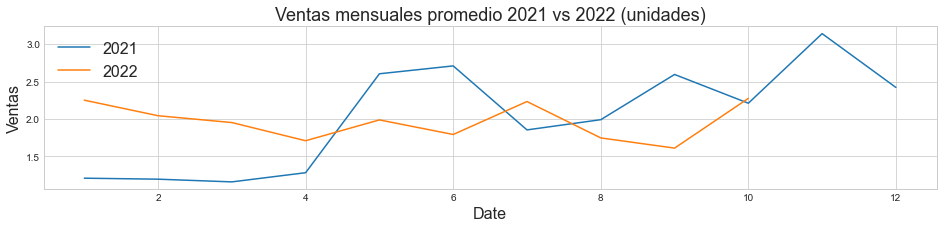

In [37]:
#G9. Ventas mensuales promedio 2022 vs 2021
plt.figure(figsize=(16,3))
data3[data3['Ano'] == 2021].groupby('NMes')['Cantidad'].mean().plot()
data3[data3['Ano'] == 2022].groupby('NMes')['Cantidad'].mean().plot()

plt.title('Ventas mensuales promedio 2021 vs 2022 (unidades)', fontsize=18)
plt.legend(['2021', '2022'], loc='best', fontsize=16)
plt.ylabel('Ventas', fontsize=16)
plt.xlabel('Date', fontsize=16);

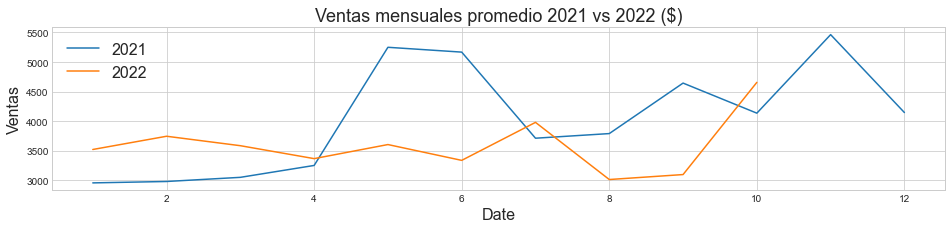

In [38]:
# G10. Categorías
plt.figure(figsize=(16,3))
data3[data3['Ano'] == 2021].groupby('NMes')['Total Sin Iva'].mean().plot()
data3[data3['Ano'] == 2022].groupby('NMes')['Total Sin Iva'].mean().plot()

plt.title('Ventas mensuales promedio 2021 vs 2022 ($)', fontsize=18)
plt.legend(['2021', '2022'], loc='best', fontsize=16)
plt.ylabel('Ventas', fontsize=16)
plt.xlabel('Date', fontsize=16);

In [39]:
#Crear categorías de meses altos, bajos y regulares
data4 = data3.assign(temporalidad = data3.Week.replace({1: 1, 2: 2, 3:2, 4:2, 5: 1, 6: 2, 7:2, 8:2, 9:2, 10:2, 11:1, 12:1, 
                                                        13:2, 14:1, 15:1, 16:1, 17:1, 18:3, 19:3, 20:1, 21:3, 22:3, 23:2,
                                                       24:2, 25:2, 26:2, 27:2, 28:3, 29:2, 30:2, 31:2, 32:2, 33:2, 34:2, 
                                                       35:2, 36:2, 37:2, 38:2, 39:2, 40:2, 41:2, 42:1, 42:1, 43:1, 44:1, 
                                                       45:1, 46:3, 47:3, 48:3, 49:3, 50:3, 51:3, 52:3, 53:3}))
data4

,Fecha,Dia,Mes,Sem,Categoria.,Marca.,Canal.,Ano,Cantidad,Total Sin Iva,Categoria Cuotas,Sku,YTD,Date,Day,Week,Month,Year,NMes,temporalidad
0,01/01/2021,Viernes,Enero,53 Sem,Calentadores Agua,A,ClaroShop,2021,1,2183.160000,Calentadores Agua,873,ok,2021-01-01,1,53,1,2021,1,3
1,01/01/2021,Viernes,Enero,53 Sem,Parrillas,A,ClaroShop,2021,1,3233.160000,Parrillas,878,ok,2021-01-01,1,53,1,2021,1,3
2,01/01/2021,Viernes,Enero,53 Sem,Campanas Extractoras,A,Liverpool,2021,1,3081.960000,Campanas Extractoras,274,ok,2021-01-01,1,53,1,2021,1,3
3,01/01/2021,Viernes,Enero,53 Sem,Campanas Extractoras,A,Liverpool,2021,1,4199.160000,Campanas Extractoras,705,ok,2021-01-01,1,53,1,2021,1,3
4,01/01/2021,Viernes,Enero,53 Sem,Calentadores Agua,A,Liverpool,2021,1,1443.960000,Calentadores Agua,827,ok,2021-01-01,1,53,1,2021,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167797,18/10/2022,Martes,Octubre,42 Sem,Parrillas,A,Amazon,2022,1,2808.583963,Parrillas,419,ok,2022-10-18,18,42,10,2022,10,1
167798,22/10/2022,Sábado,Octubre,42 Sem,Campanas Extractoras,A,Liverpool,2022,1,3287.082686,Campanas Extractoras,492,ok,2022-10-22,22,42,10,2022,10,1
167799,18/10/2022,Martes,Octubre,42 Sem,Campanas Extractoras,A,Amazon,2022,1,3525.992861,Campanas Extractoras,618,ok,2022-10-18,18,42,10,2022,10,1
167800,22/10/2022,Sábado,Octubre,42 Sem,Hornos,A,Liverpool,2022,1,9044.980300,Hornos,873,ok,2022-10-22,22,42,10,2022,10,1


In [40]:
#Crear dos series de datos 2020 y 2021
d42021 = data4[data4['Year'] == 2021]
d42022 = data4[data4['Year'] == 2022]

In [41]:
#T2
#Agrupar por temporalidad baja=1, regualar=2, alta=3
data4_g1 = data4[data4['Year'] == 2021].groupby(['temporalidad'], as_index = False).mean()

data4_g1


,temporalidad,Ano,Cantidad,Total Sin Iva,Sku,Day,Week,Month,Year,NMes
0,1,2021.0,2.277967,4510.599234,609.158750,14.684230,27.055655,6.780839,2021.0,7.638829
1,2,2021.0,2.037110,3954.712122,620.038026,16.021075,26.163181,6.513044,2021.0,7.359349
2,3,2021.0,2.704616,4779.296770,603.791779,18.874134,41.806270,9.912484,2021.0,9.805563


### e) Análisis por categorías
Se creron tres categorías para agrupar las semanas en temporadas bajas (1), regulares (2) y altas (3) 
Se agruparon los datos por las tres categorías y se calculó la media de las ventas para los años 2021 y 2022 
que se resumen en las tablas T2 y T3 respectivamente. 
Se presentaron algunas incongurencias al elaborar las cetegorías, ya que las semanas bajas presentan una media mayor a las 
semanas regulares, lo anterior puede estar explicado por la presencia de ouliers los cuales hacen incrementar el promedio. 

Desagregando el análisis por canales se percibe una mayor diferencia en las medias de cata tipo de semana, por ejemplo, para Amazon las temporadas altas tienen una venta semanal promedio de 9.3 unidades, y las temporadas bajas de 5.13.

Este anális es importante sin embargo se tiene que replantear la categorización para poder distinguir con mayor precición las temporadas. 


In [42]:
#T3
data4_g2 = data4[data4['Year'] == 2022].groupby(['temporalidad'], as_index = False).mean()

data4_g2

,temporalidad,Ano,Cantidad,Total Sin Iva,Sku,Day,Week,Month,Year,NMes
0,1,2022.0,1.913111,3480.945068,593.820146,15.198929,13.341777,3.563090,2022.0,3.514291
1,2,2022.0,1.878170,3391.803782,576.944816,15.993290,22.346272,5.598696,2022.0,5.524446
2,3,2022.0,2.293820,4072.345554,590.501589,17.337022,23.419894,5.385874,2022.0,5.214715


In [43]:
#T4
#Grupo por temporalidad y canal
data4_g3 = data4[['temporalidad', 'Canal.', 'Cantidad', 'Total Sin Iva']]
grouped_t1 = data4_g3.groupby(['Canal.', 'temporalidad'],as_index=False).mean()
grouped_t1

,Canal.,temporalidad,Cantidad,Total Sin Iva
0,Amazon,1,5.153462,8892.779036
1,Amazon,2,4.919377,8087.770288
2,Amazon,3,9.300709,15593.857021
3,ClaroShop,1,1.342138,2556.470477
4,ClaroShop,2,1.229182,2469.035028
5,ClaroShop,3,1.335605,2499.848405
6,Coppel,1,1.148936,3003.148897
7,Coppel,2,1.281690,3292.143134
8,Coppel,3,2.923077,3412.679144
9,Elektra,1,1.068441,2547.585473


In [44]:
#T5 2021
data4_21 = d42021[['temporalidad', 'Canal.', 'Cantidad', 'Total Sin Iva']]
g_t21 = data4_21.groupby(['Canal.', 'temporalidad'],as_index=False).mean()
g_t21

,Canal.,temporalidad,Cantidad,Total Sin Iva
0,Amazon,1,6.096891,10791.295469
1,Amazon,2,5.311860,9241.545173
2,Amazon,3,9.826590,16253.170321
3,ClaroShop,1,1.343001,2556.723783
4,ClaroShop,2,1.238841,2481.225810
5,ClaroShop,3,1.336177,2502.497611
6,Coppel,1,1.000000,3332.760000
7,Coppel,2,1.027027,3109.611892
8,Coppel,3,4.666667,4046.183750
9,Elektra,1,1.046980,2363.077852


In [45]:
#T6 2022
data4_22 = d42022[['temporalidad', 'Canal.', 'Cantidad', 'Total Sin Iva']]
g_t22 = data4_22.groupby(['Canal.', 'temporalidad'],as_index=False).mean()
g_t22

,Canal.,temporalidad,Cantidad,Total Sin Iva
0,Amazon,1,4.562480,7703.510384
1,Amazon,2,4.712792,7480.475447
2,Amazon,3,8.517434,14611.840654
3,ClaroShop,1,1.000000,2456.034483
4,ClaroShop,2,1.075000,2274.439655
5,ClaroShop,3,1.000000,947.413793
6,Coppel,1,1.175000,2945.466954
7,Coppel,2,1.311321,3313.381045
8,Coppel,3,1.232323,2798.371648
9,Elektra,1,1.096491,2788.740169


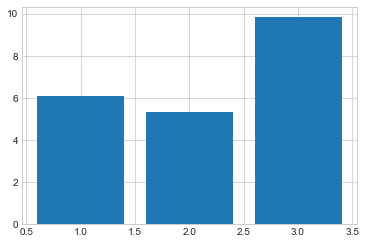

In [46]:
#G.11 Grafica
#2022

plt.bar(g_t21['temporalidad'], g_t21['Cantidad'])
plt.show()

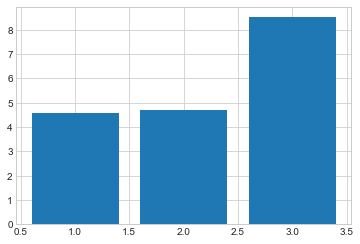

In [47]:
#G. 12 2022

plt.bar(g_t22['temporalidad'], g_t22['Cantidad'])
plt.show()

### Matriz de correlaciones

In [48]:
#T7
#Realizar correlaciones para ver la relación entre variables
#Matrix de correlación
corr_matrix = data4.corr(method='pearson')
corr_matrix

,Ano,Cantidad,Total Sin Iva,Sku,Day,Week,Month,Year,NMes,temporalidad
Ano,1.000000,-0.031411,-0.048284,-0.056616,-0.037235,-0.365569,-0.375848,1.000000,-0.466846,-0.106166
Cantidad,-0.031411,1.000000,0.851694,0.009626,0.019183,0.041684,0.041769,-0.031411,0.045089,0.031861
Total Sin Iva,-0.048284,0.851694,1.000000,-0.001481,0.012906,0.042671,0.044982,-0.048284,0.046882,0.025681
Sku,-0.056616,0.009626,-0.001481,1.000000,-0.009015,-0.001335,-0.002935,-0.056616,-0.002596,-0.002174
Day,-0.037235,0.019183,0.012906,-0.009015,1.000000,0.073357,0.022283,-0.037235,0.028769,0.136476
Week,-0.365569,0.041684,0.042671,-0.001335,0.073357,1.000000,0.968019,-0.365569,0.775391,0.349420
Month,-0.375848,0.041769,0.044982,-0.002935,0.022283,0.968019,1.000000,-0.375848,0.805758,0.314694
Year,1.000000,-0.031411,-0.048284,-0.056616,-0.037235,-0.365569,-0.375848,1.000000,-0.466846,-0.106166
NMes,-0.466846,0.045089,0.046882,-0.002596,0.028769,0.775391,0.805758,-0.466846,1.000000,0.260901
temporalidad,-0.106166,0.031861,0.025681,-0.002174,0.136476,0.349420,0.314694,-0.106166,0.260901,1.000000


## Parte 2. Análisis de Filtros de Agua

Primero se crearon dos bases de datos nuevas, una para los purificadores de agua "965" y otra para los filtros "477"

La descripción estadística arroja que en promedio (2021-2022) se vendieron 2.42 purificadores de agua y 3.464 filtros de agua
díarios, y el monto de venta fue de 4011.46 y 2736.2 pesos díarios para los purificadores y filtros respectivamente. 



In [53]:
###########Análisis Filtros############
#Crear una base FPA5L
data477 = data4[data4['Sku'] == 477]
data965 = data4[data4['Sku'] == 965]

In [54]:
#T8
data965.describe()

,Ano,Cantidad,Total Sin Iva,Sku,Day,Week,Month,Year,NMes,temporalidad
count,4368.000000,4368.000000,4368.000000,4368.0,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000
mean,2021.478251,2.425366,4011.446196,965.0,16.337225,24.989469,6.182005,2021.478251,6.103938,2.056548
std,0.499584,5.976553,8709.939763,0.0,9.021084,13.199353,3.052937,0.499584,2.973003,0.679281
min,2021.000000,1.000000,0.000000,965.0,1.000000,1.000000,1.000000,2021.000000,1.000000,1.000000
25%,2021.000000,1.000000,1637.068966,965.0,8.000000,16.000000,4.000000,2021.000000,4.000000,2.000000
50%,2021.000000,1.000000,1763.160000,965.0,16.000000,24.000000,6.000000,2021.000000,6.000000,2.000000
75%,2022.000000,1.000000,2317.560000,965.0,24.000000,35.000000,8.000000,2022.000000,8.000000,3.000000
max,2022.000000,130.000000,181514.850000,965.0,31.000000,53.000000,12.000000,2022.000000,12.000000,3.000000


In [55]:
#T9
data477.describe()

,Ano,Cantidad,Total Sin Iva,Sku,Day,Week,Month,Year,NMes,temporalidad
count,3447.000000,3447.000000,3447.000000,3447.0,3447.000000,3447.000000,3447.000000,3447.000000,3447.000000,3447.000000
mean,2021.619669,3.642298,2736.299501,477.0,16.220772,25.311575,6.263127,2021.619669,6.442124,2.061793
std,0.485539,8.670735,6058.691338,0.0,8.746162,13.445224,3.093266,0.485539,3.039124,0.667163
min,2021.000000,1.000000,0.000000,477.0,1.000000,1.000000,1.000000,2021.000000,1.000000,1.000000
25%,2021.000000,1.000000,749.137931,477.0,9.000000,16.000000,4.000000,2021.000000,4.000000,2.000000
50%,2022.000000,1.000000,830.760000,477.0,16.000000,25.000000,6.000000,2022.000000,7.000000,2.000000
75%,2022.000000,2.000000,1342.320000,477.0,24.000000,35.000000,9.000000,2022.000000,9.000000,3.000000
max,2022.000000,139.000000,94201.910000,477.0,31.000000,53.000000,12.000000,2022.000000,12.000000,3.000000


### a) Análisis de ventas
En las gráficas G13 y G14 se observa un monto de ventas promedio mesuales y díarias superiores para 477. Además se percibe una sincrónia en el comportamiento de ventas para los dos productos, esto es, cuando hay temporadas altas y bajas los dos productos se comportan de la misma manera. En ese sentido, los meses con mayor número de ventas son mayo, junio, octubre y noviembre. Y las semanas con mayor venta promedio son 21, 22, 25, 28, 39, 41, 42, 43, 45, 46. 

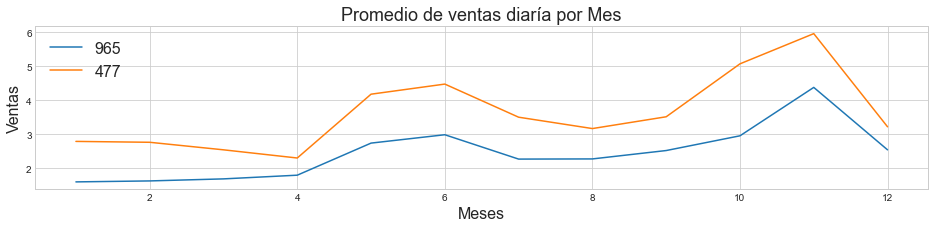

In [57]:
#G13
plt.figure(figsize=(16,3))
data965.groupby('NMes')['Cantidad'].mean().plot()
data477.groupby('NMes')['Cantidad'].mean().plot()

plt.title('Promedio de ventas diaría por Mes', fontsize=18)
plt.legend(['965', '477'], loc='best', fontsize=16)
plt.ylabel('Ventas', fontsize=16)
plt.xlabel('Meses', fontsize=16);

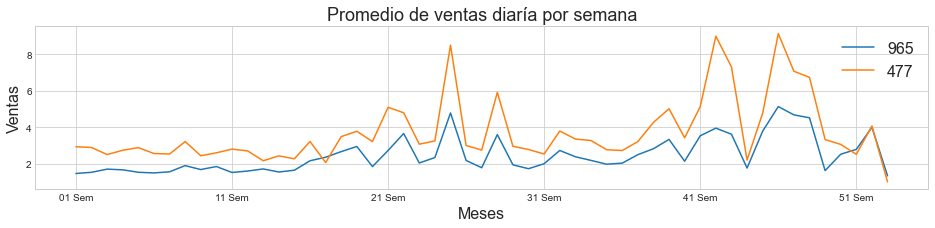

In [58]:
#G14
plt.figure(figsize=(16,3))
data965.groupby('Sem')['Cantidad'].mean().plot()
data477.groupby('Sem')['Cantidad'].mean().plot()

plt.title('Promedio de ventas diaría por semana', fontsize=18)
plt.legend(['965', '477'], loc='best', fontsize=16)
plt.ylabel('Ventas', fontsize=16)
plt.xlabel('Meses', fontsize=16);

### b) Correlación
Las gráficas de correlación G15 (2021-2022), G16 (2021), G17 (2022) indican una correlación positiva y fuerte entre las ventas de 477 y 965. Estos hecho se cuamprueban al calcular el coeficiente de correlación y su significancia estadistica, esto es, una correlación fuerte entre las ventas de los dos productos que es significativa estadísticamente. Lo fuerte correlación permite estimar una regresión líneal para observar el comportamiento de estos dos productos. 

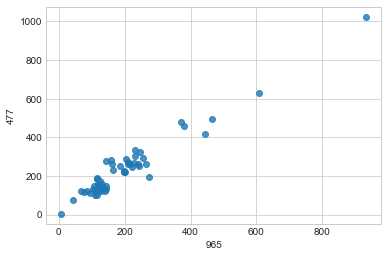

In [59]:
#G15
#Scatter PA5L-FPA5L por semana 2021-2022
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=data965.groupby('Sem').sum()['Cantidad'], y=data477.groupby('Sem').sum()['Cantidad'], alpha= 0.8)
ax.set_xlabel("965")
ax.set_ylabel('477');

In [60]:

#Correlación y nivel de significancia
r, p = stats.pearsonr(data965.groupby('Sem').sum()['Cantidad'], data477.groupby('Sem').sum()['Cantidad'])
print(f"Correlación Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(data965.groupby('Sem').sum()['Cantidad'], data477.groupby('Sem').sum()['Cantidad'])
print(f"Correlación Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(data965.groupby('Sem').sum()['Cantidad'],data477.groupby('Sem').sum()['Cantidad'])
print(f"Correlación Pearson: r={r}, p-value={p}")

Correlación Pearson: r=0.9684164815779086, p-value=1.9753713506763933e-32
Correlación Spearman: r=0.885445858126362, p-value=1.3318895111620197e-18
Correlación Pearson: r=0.6933430797047072, p-value=2.638153169049237e-13


In [62]:
#Análisis por año
data965_21 = data965[data965['Year'] == 2021]
data477_21 = data477[data477['Year'] == 2021]

data965_22 = data965[data965['Year'] == 2022]
data477_22 = data477[data477['Year'] == 2022]


In [63]:
#Correlación 2021
r, p = stats.pearsonr(data965_21.groupby('Sem').sum()['Cantidad'], data477_21.groupby('Sem').sum()['Cantidad'])
print(f"Correlación Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(data965_21.groupby('Sem').sum()['Cantidad'], data477_21.groupby('Sem').sum()['Cantidad'])
print(f"Correlación Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(data965_21.groupby('Sem').sum()['Cantidad'],data477_21.groupby('Sem').sum()['Cantidad'])
print(f"Correlación Pearson: r={r}, p-value={p}")

Correlación Pearson: r=0.8987999460166466, p-value=6.66443581777423e-20
Correlación Spearman: r=0.8846759019597001, p-value=1.5649167565959753e-18
Correlación Pearson: r=0.7344567796243718, p-value=1.2884810151189722e-14


In [64]:
#Correlación 2022
r, p = stats.pearsonr(data965_22.groupby('Sem').sum()['Cantidad'], data477_22.groupby('Sem').sum()['Cantidad'])
print(f"Correlación Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(data965_22.groupby('Sem').sum()['Cantidad'], data477_22.groupby('Sem').sum()['Cantidad'])
print(f"Correlación Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(data965_22.groupby('Sem').sum()['Cantidad'],data477_22.groupby('Sem').sum()['Cantidad'])
print(f"Correlación Pearson: r={r}, p-value={p}")

Correlación Pearson: r=0.9286313719414956, p-value=1.0769937658726034e-19
Correlación Spearman: r=0.6187000077660272, p-value=7.596750199856164e-06
Correlación Pearson: r=0.4831674649426535, p-value=4.70612306104907e-06


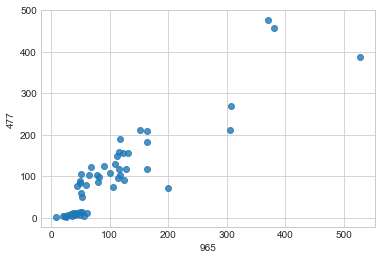

In [65]:
#G16
#Scatter 2021
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=data965_21.groupby('Sem').sum()['Cantidad'], y=data477_21.groupby('Sem').sum()['Cantidad'], alpha= 0.8)
ax.set_xlabel("965")
ax.set_ylabel('477');

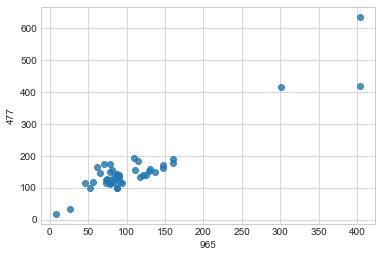

In [66]:
#G17
#Scatter 2022
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=data965_22.groupby('Sem').sum()['Cantidad'], y=data477_22.groupby('Sem').sum()['Cantidad'], alpha= 0.8)
ax.set_xlabel("965")
ax.set_ylabel('477');

### c) Estimación del modelo de regresión líneal simple

Se estimaron tres modelos de regresión lineal simple donde la variable dependiente es 477 y la independiente 965. El primer modelo se estimo con datos en niveles e información de las ventas vendidas semanalmente en unidades, el segundo con datos en logaritmos y temporalidad semanal, y el tercero con valores en nivel e información de ventas díarias. Para los tres modelos se utilizo información del 2022. 

1) Da como resultado una R2 de 0.84, lo cual indica que la veta de 965 explica el 84% de las variaciones en las ventas de 477. La probabilidad del estadístico F indica que el modelo explica mejor que valores aleatorios, por lo cual es un mejor modelo. 
El coeficiente de la variable 965 resultó de 0.9742 y es estadísticamente significativa. El coeficiente se interpreta como: por cada aumento en una unidad vendida semanalmente de 965 se incrementá la venta semanal de 477 en 0.9742 unidades. Lo que es lo mismo, si 965 aumenta sus ventas en 10 unidades semanales, entonces, 477 aumentará sus ventas en 9.47 unidades. Si se quisiera predecir las ventas de 477 se debe incluir además del coeficiente de 965 la constante que es de 46.7. Siendo el modelo y = 0.9474x + 46.7
Para este modelo el error cuadrático medio es de 68.39
Por otro lado las pruebas de normalidad a los errores indican que no se puede rechazar la hipotesis de normalidad, por lo cuál lo errores se aproximan a la normal. Siendo lo anterior un buen indicio para las predicciones del modelo. 

2) La ecuación resultande del modelo logaritmico es de Ly = 0.6175Lx + 1.6691.
El modelo pasa todas las pruebas satisfactoriamente. La única diferencia es que disminuye R2 a 0.4.
La interpretación sería: por cada incremento en 1% de las ventas de 965 se incrementa las ventas de 477 en 0.64%

3) La ecuación del modelo lineal de ventas diarias es: y = 1.0766x +5.91
El modelo pasa todas las pruebas satisfactoriamente. La única diferencia es que  R2 = 0.77. Y el error cuadrático medio es igual a 7.43.
L interpretación del modelo es: por cada aumento en una unidad en la venta diaria de 965 se incrementa en 1.07 la venta de 477 (más la constante)

En conclusión los tres modelos estimados son adecuados para estimar las ventas de 477 al variar 965. 


In [68]:
#Modelo Líneal
# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [72]:
#AJUSTE DEL MODELO
#Aplicó un modelo por semana para el año 2022, total de observaciones=35
# División de los datos en train y test
# ==============================================================================
X = x=data965_22.groupby('Sem').sum()['Cantidad']
y = data477_22.groupby('Sem').sum()['Cantidad']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [74]:
#A)
# Información del modelo
# ==============================================================================
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     178.4
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           7.32e-15
Time:                        12:33:26   Log-Likelihood:                -168.24
No. Observations:                  35   AIC:                             340.5
Df Residuals:                      33   BIC:                             343.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.7054      9.362      4.989      0.0

In [73]:
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[172.38018483]
 [110.02990469]
 [158.74106105]]

El error (rmse) de test es: 68.39901226370087


In [75]:
#Predicciones
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,174.328631,5.438225,163.264479,185.392783,111.325568,237.331694
1,189.916201,5.915418,177.881194,201.951209,126.735413,253.096989
2,115.875243,5.789100,104.097231,127.653256,52.742905,179.007582
3,117.823690,5.724100,106.177922,129.469458,54.715889,180.931490


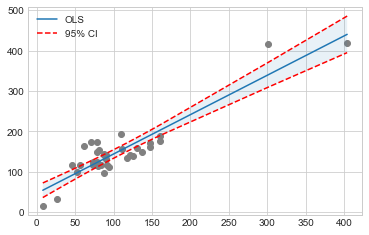

In [76]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

In [77]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
y_train = y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

In [78]:
#Pruebas
#Test de normalidad
# Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(residuos_train)
shapiro_test

ShapiroResult(statistic=0.9242516756057739, pvalue=0.018939271569252014)

In [79]:
# Normalidad de los residuos D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(residuos_train)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 4.45948002098459, p-value = 0.10755639003389281


In [ ]:
#Los test de normalidad indican que los resuidos se comportan aproximados a una normal, 
#ya que no se puede rechazar la hipotesis nula de normalidad. 

In [80]:
#Modelo linel logaritmico, VENTAS DIARIAS
#Crear los valores logaritmicos
data965_22l = data965_22.assign(logCan = np.log(data965_22['Cantidad']))
data477_22l = data477_22.assign(logCan = np.log(data477_22['Cantidad']))

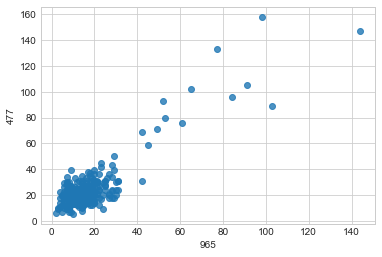

In [81]:
#Si se puede utilizar las ventas diarias para estimar un modelo
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=data965_22.groupby('Date').sum()['Cantidad'], y=data477_22.groupby('Date').sum()['Cantidad'], alpha= 0.8)
ax.set_xlabel("965")
ax.set_ylabel('477');

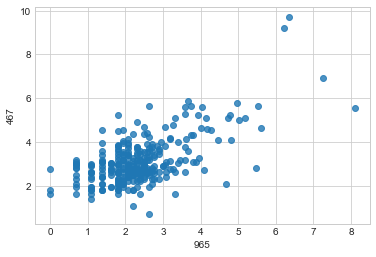

In [82]:
#Disperción con logaritmos
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=data965_22l.groupby('Date').sum()['logCan'], y=data477_22l.groupby('Date').sum()['logCan'], alpha= 0.8)
ax.set_xlabel("965")
ax.set_ylabel('467');

In [86]:
#AJUSTE DEL MODELO Logaritmo
#Aplicó un modelo por día para el año 2022, total de observaciones=229
# División de los datos en train y test
# ==============================================================================
X = x=data965_22l.groupby('Date').sum()['logCan']
y = data477_22l.groupby('Date').sum()['logCan']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [89]:
# Información del modelo
# ==============================================================================
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     151.3
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           5.58e-27
Time:                        12:36:11   Log-Likelihood:                -294.15
No. Observations:                 229   AIC:                             592.3
Df Residuals:                     227   BIC:                             599.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6691      0.132     12.653      0.0

In [87]:
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[3.68104116]
 [3.14985082]
 [3.80926235]]

El error (rmse) de test es: 0.7971914256558801


In [90]:
#Predicciones
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,3.977186,0.090299,3.799255,4.155118,2.237872,5.716501
1,2.775551,0.064649,2.648162,2.902939,1.040678,4.510424
2,3.025933,0.058594,2.910476,3.141390,1.291895,4.759971
3,2.953200,0.059704,2.835555,3.070845,1.219015,4.687384


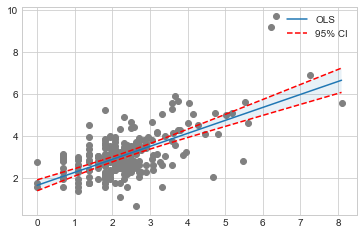

In [91]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

In [97]:
#Parece ser un mejor modelo el lineal sin logaritmos
#Calculo de un modelo lineal con ventas dáirias, para tener más observaciones en el modelo
#AJUSTE DEL MODELO
#Aplicó un modelo por día para el año 2022, total de observaciones=229
# División de los datos en train y test
# ==============================================================================
X = data965_22.groupby('Date').sum()['Cantidad']
y = data477_22.groupby('Date').sum()['Cantidad']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [100]:
# Información del modelo
# ==============================================================================
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     783.9
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           1.42e-75
Time:                        12:37:44   Log-Likelihood:                -841.61
No. Observations:                 229   AIC:                             1687.
Df Residuals:                     227   BIC:                             1694.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9165      0.918      6.444      0.0

In [98]:
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[23.14216011]
 [17.75913392]
 [27.44858106]]

El error (rmse) de test es: 7.430742916657151


In [101]:
#Predicciones
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,30.678397,0.670730,29.356744,32.000050,11.738090,49.618703
1,14.529318,0.727193,13.096406,15.962230,-4.419077,33.477714
2,20.988950,0.646062,19.715904,22.261995,2.051973,39.925927
3,19.912344,0.654654,18.622368,21.202321,0.974222,38.850467


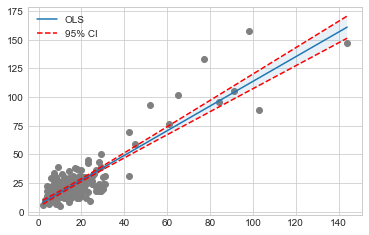

In [102]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();